# Основи нейромереж

Розібратись із прикладами нейромереж для класифікації датасету FashionMNIST (лише Dense слої)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Завантажимо Fashion MNIST датасет. Так як це вбудований датасет, то він одразу завантажується розбитий на тренувальну та тестову частини
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Додамо для зручності функцію, яка буде відображати графічно результати тренування моделі
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Аналіз датасету


In [ ]:
# Спочатку подивимось що собою представляють лейбли
print(y_train[:10])
print(y_train.max())

[9 0 0 3 0 2 7 2 5 5]
9


Можемо побачити, що маємо 10 видів лейблів, від 0 до 9.

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Усього в тренувальному датасеті 60000 зображень, у тестовому 10000. Розмір зображень - 28 на 28 пікселів.

Label: 1

Image pixel array:
 [[  0   0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6  30   3   4   4  13  21  30  49  31   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 158 229 214 215 208 212 215 214 227 228   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 202 206 205 212 233 244 214 200 205 196   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 226 208 196 182 240 211 202 194 194 252   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 232 204 203 176 217 208 205 192 184 251  31   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8 253 202 199 180 205 196 190 202 192 233  57   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 250 185 197 180 199 196 182 203 187 209  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43 241 190 197 

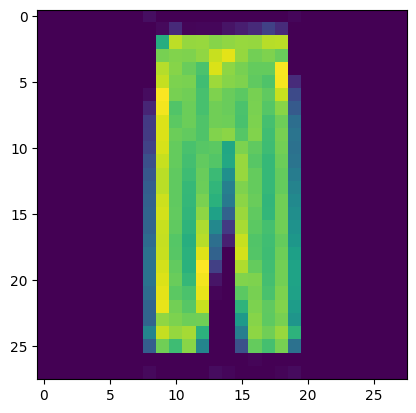

In [ ]:
# Подивимось на якесь окреме зображення
index = 21
np.set_printoptions(linewidth=320)

print(f"Label: {y_train[index]}")
print(f"\nImage pixel array:\n {x_train[index]}")

plt.imshow(x_train[index])

Зображення в датасеті мають grayscale формат (відтінки сірого), тобто кожна фіча - це значення від 0 до 255. Тепер перейдемо до класифікації.

## Класифікація

In [4]:
# Потрібно виконати масштабування фічей у діапазон від 0 до 1, так як діапазон 0...255 нам не підходить
x_train = x_train / 255.0
x_test = x_test / 255.0

### Тільки Dense слої

In [ ]:
# Побудуємо модель. Для трансформації зображень у одновимірний масив використаємо слой Flatten.
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ],
)

In [ ]:
# Подивимось опис моделі
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 128)               100480    
                                                                 
 dense_69 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Компілюємо та тренуємо модель на 5-ти епохах
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4978 - accuracy: 0.8235 - val_loss: 0.4788 - val_accuracy: 0.8287
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3733 - accuracy: 0.8666 - val_loss: 0.3834 - val_accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3343 - accuracy: 0.8793 - val_loss: 0.3564 - val_accuracy: 0.8733
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3108 - accuracy: 0.8856 - val_loss: 0.3572 - val_accuracy: 0.8729
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2930 - accuracy: 0.8913 - val_loss: 0.3518 - val_accuracy: 0.8739


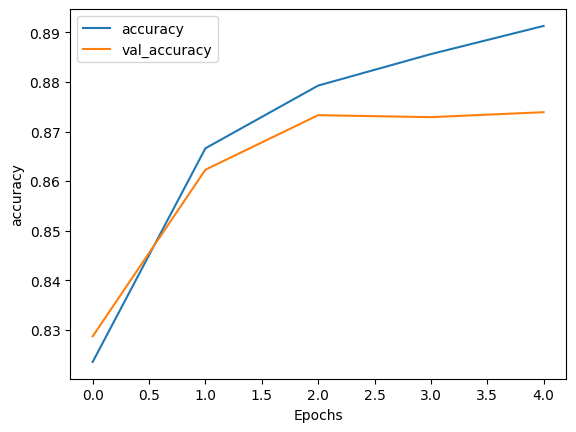

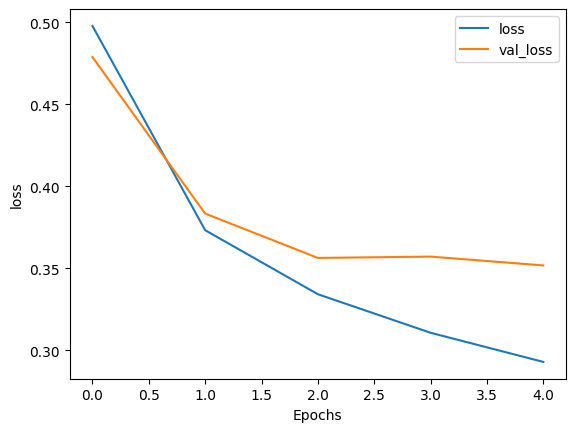

In [ ]:
# Намалюємо графік зміни accuracy та loss моделі
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### Висновок
Tensorflow та Keras представляють дуже потужний API, за допомогою якого можливо швидко та досить зручно побудувати нейронну мережу. У цій роботі ми побудували просто нейронку для класифікації Fashion MNIST датасету, використовуючи тільки Dense слої для навчання. Навіть така просто нейронна мережа показує досить непоганий результат у классифікації зображень. Результати можливо ще покращити за допомогою тюнінгу гіперпараметрів моделі.

Давайте подивимось, як впорається з такою класифікацією CNN.

### CNN

In [22]:
# Побудуємо CNN модель
model = tf.keras.models.Sequential(
    [
        # Додамо Conv2D слої (так як у нас зображення у вигляді двумірних масивів)
        # та MaxPooling2D перед слоями, які використовували в попередньому прикладі
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ],
)

In [23]:
# Подивимось опис моделі
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 5408)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               692352    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

In [24]:
# Компілюємо та тренуємо модель на 5-ти епохах
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3904 - accuracy: 0.8627 - val_loss: 0.3099 - val_accuracy: 0.8883
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2677 - accuracy: 0.9027 - val_loss: 0.3216 - val_accuracy: 0.8802
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2210 - accuracy: 0.9191 - val_loss: 0.2595 - val_accuracy: 0.9068
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1888 - accuracy: 0.9305 - val_loss: 0.2571 - val_accuracy: 0.9091
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1611 - accuracy: 0.9402 - val_loss: 0.2596 - val_accuracy: 0.9078


Можно побачити, що додавши лише Conv2 та MaxPooling2D ми значно покращили якість моделі.

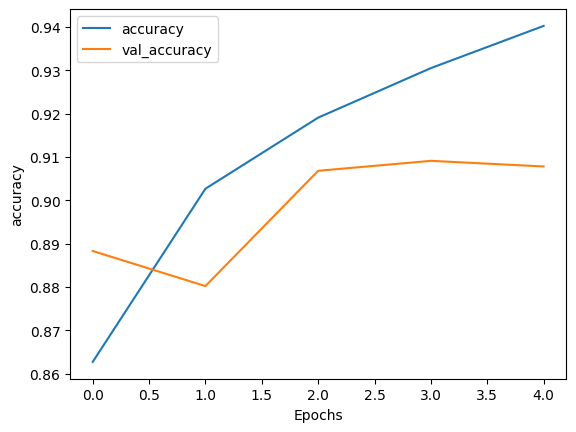

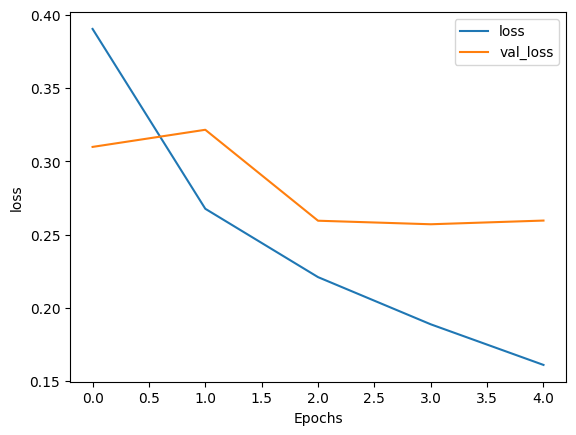

In [25]:
# Намалюємо графік зміни accuracy та loss моделі
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Подивимось, чи можемо ми ще більше покращити метрики.

In [30]:
# Побудуємо CNN модель
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax")
    ],
)
# Компілюємо та тренуємо модель на 20-ти епохах
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.4972 - accuracy: 0.8190 - val_loss: 0.3479 - val_accuracy: 0.8704
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3143 - accuracy: 0.8862 - val_loss: 0.2941 - val_accuracy: 0.8926
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2727 - accuracy: 0.9010 - val_loss: 0.2738 - val_accuracy: 0.8981
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2455 - accuracy: 0.9109 - val_loss: 0.2524 - val_accuracy: 0.9079
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2252 - accuracy: 0.9172 - val_loss: 0.2527 - val_accuracy: 0.9072
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2042 - accuracy: 0.9252 - val_loss: 0.2382 - val_accuracy: 0.9138
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1892 - accuracy: 0.9291 - val_loss: 0.2222 - val_accuracy: 0.9209
Epoch 

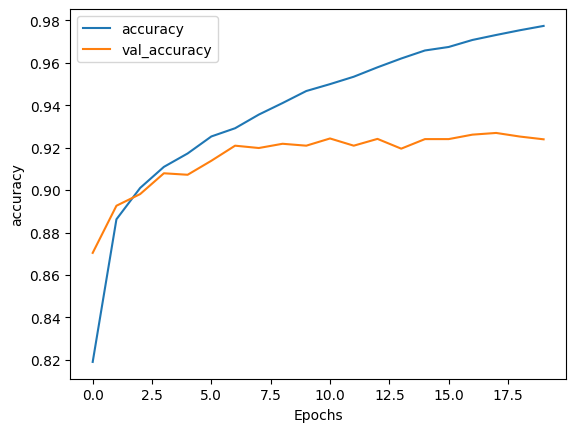

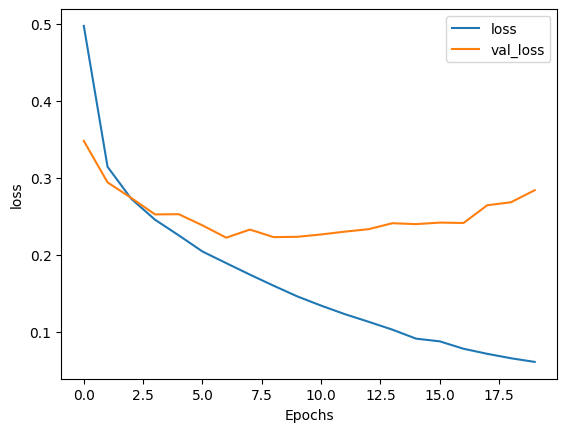

In [31]:
# Намалюємо графік зміни accuracy та loss моделі
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Як бачимо, метрики покращились, але можно зробити висновок, що модель перенавчилась на тренувальних даних.

1/1 [==============================] - 0s 77ms/step


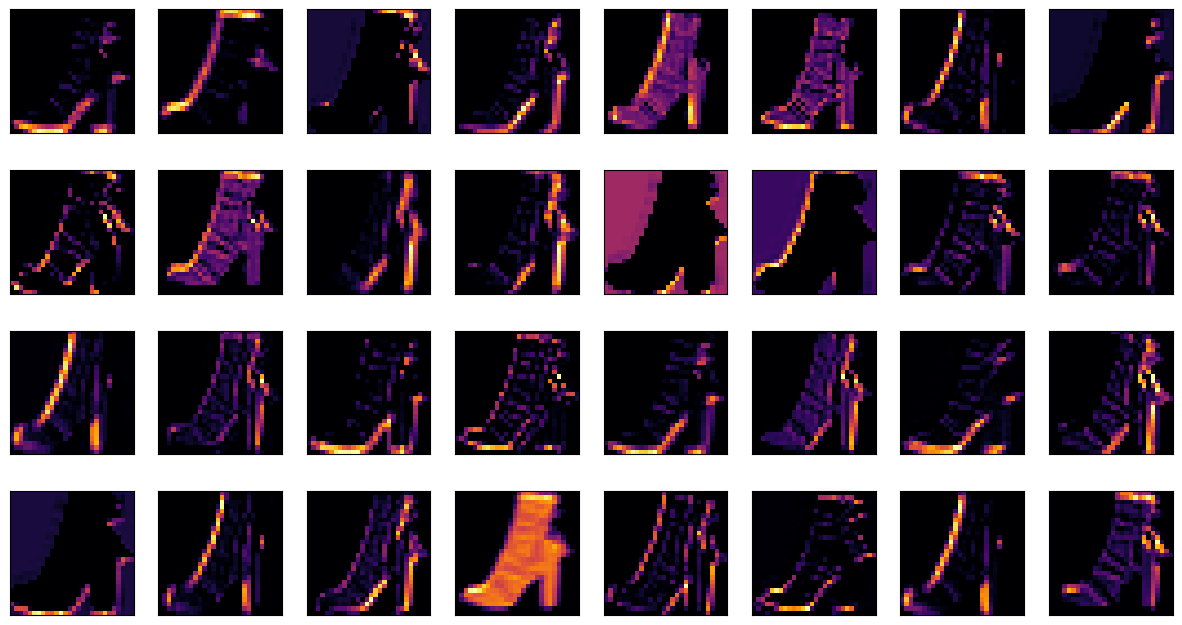

In [38]:
# Подивимось, як працює слой згортки

# Візьмемо conv слой з нашої останньої моделі
layer_name = "conv2d_47"

# Отримаємо словник з усіма слоями моделі
layer_dict = {layer.name : layer for layer in model.layers}

# Створимо копію нашої моделі лише з Conv2D слоєм
modelslice = tf.keras.Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)

# Вибираємо окреме зображення з тренувальної частини
image = x_train[11]

# Нормалізуємо розмірність
image = np.expand_dims(image, axis=0)

# Отримуємо фічі
feature_maps = modelslice.predict(image)

plt.figure(figsize=(15, 8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i-1], cmap="inferno")

Можемо наглядно побачити як працюють кернели у згортковому слої, та як відбувається feature extraction.

### Висновок

CNN є дуже поширенник рішенням при классифікації зображень. Як ми побачили, додавши лише декілька слоїв до базової моделі ми значно покращили її якість. Експериментування з архітектурою моделі та гіперпараметрами дозволить уникнути перенавчання та ще більше покращити модель.